In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq, rfft, irfft
from scipy import signal
from scipy.io import wavfile


METHOD 2:
Convoluting in frequency domain
Timeshift: 0.005600907029478458


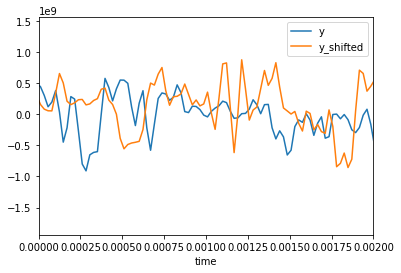

Wall time: 259 ms


In [4]:
%%time
# Load wav files.
#samplerate_y, y = wavfile.read('1kHz100ms_48k_0_1msShift.wav')
#samplerate_y2, y2 = wavfile.read('1kHz100ms_48k_0shift.wav')
samplerate_y, y = wavfile.read('602msTo702ms.wav')
samplerate_y2, y2 = wavfile.read('600msTo700ms.wav')

# Define time steps for shifting.
dt = (1/samplerate_y)

# Number of samples.
n = len(y) #512

# Calculate time length.all
lengthY = (1/samplerate_y) * len(y)

# Generate fft bin frequency 
freq = fftfreq(n, dt)

# Windowing of Inputs
y = y * np.hamming(n)
y2 = y2 * np.hamming(n)

# Generate FFT
Y = fft(y)
Y2 = fft(y2)

# Generate x axis for plots.
time = np.linspace((-n * dt)/2, (n * dt)/2, n)

## METHOD 2 - Convoluting in frequency domain ##
print("\nMETHOD 2:")
print("Convoluting in frequency domain")
# Calculate the complex conjugated signal
Yr = -Y.conjugate() 
Y2r = -Y2.conjugate() 
# Convolute the signals.
conv = Yr*Y2r
# Inverse FFT to convert to time domain.
iffconv = ifft(conv)
# Calculate time pr sample
timePrIndex = 1/samplerate_y
# Calculate the time shift: Find the index with the highest area overlap of the signals
maxAreaIndex = np.argmax(np.abs(iffconv))
#print(maxAreaIndex)
m2timeShift = (maxAreaIndex * timePrIndex)

#m2timeShift = (88 * timePrIndex)/2
print("Timeshift: " + str(m2timeShift))

# Shift the original (shifted) signal the calculated value
Y2_shifted = Y2 * np.exp(1j * 2 * np.pi * freq * m2timeShift)
y2_shifted = ifft(Y2_shifted).real

plt.figure(1)
plt.plot(time, y, label="y")
plt.plot(time, y2_shifted, label="y_shifted")
plt.xlabel("time")
plt.legend()
plt.xlim(0,0.002)
plt.show()
